In [1]:
import uncertainties as unc  
import uncertainties.unumpy as unumpy  
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

In [2]:
data = []
R = 8.31446261815324 #https://fr.wikipedia.org/wiki/Constante_universelle_des_gaz_parfaits
error = [0.05,0.05,0.01,0.01]
#5 times the minimal
j=0
while j<4:
    collumn = np.genfromtxt("Latent_heat_vaporization_data.csv", delimiter=",", usecols=(j), skip_header=2)
    collumn = unumpy.uarray(collumn, std_devs = error[j])
    data.append(collumn)
    j+=1

print(data)

calibration = []
error = [0.1,0.01]
j=0
while j<2:
    collumn = np.genfromtxt("Temp_Calibration.csv", delimiter=",", usecols=(j), skip_header=1)
    collumn = unumpy.uarray(collumn, std_devs = error[j])
    calibration.append(collumn)
    j+=1

print(calibration)

[array([80.65+/-0.05, 76.65+/-0.05, 74.2+/-0.05, 72.5+/-0.05, 69.9+/-0.05,
       67.9+/-0.05, 66.2+/-0.05, 61.9+/-0.05, 59.9+/-0.05, 57.1+/-0.05,
       55.1+/-0.05, 52.2+/-0.05, 48.55+/-0.05, 46.9+/-0.05], dtype=object), array([17.4+/-0.05, 20.9+/-0.05, 23.0+/-0.05, 24.6+/-0.05, 26.8+/-0.05,
       28.55+/-0.05, 30.05+/-0.05, 33.85+/-0.05, 35.6+/-0.05,
       38.05+/-0.05, 39.8+/-0.05, 42.35+/-0.05, 45.5+/-0.05, 46.9+/-0.05],
      dtype=object), array([329.14+/-0.01, 339.43+/-0.01, 344.13+/-0.01, 347.02+/-0.01,
       350.79+/-0.01, 353.54+/-0.01, 355.62+/-0.01, 360.51+/-0.01,
       362.36+/-0.01, 364.89+/-0.01, 366.66+/-0.01, 369.0+/-0.01,
       371.87+/-0.01, 372.91+/-0.01], dtype=object), array([76.28+/-0.01, nan+/-0.01, nan+/-0.01, nan+/-0.01, nan+/-0.01,
       nan+/-0.01, nan+/-0.01, nan+/-0.01, nan+/-0.01, nan+/-0.01,
       nan+/-0.01, nan+/-0.01, nan+/-0.01, nan+/-0.01], dtype=object)]
[array([272.7+/-0.1, 292.28+/-0.1, 372.16+/-0.1], dtype=object), array([273.15+/-0.01, 

[0.99571429 0.5720714 ]
[0.00321667 1.0168454 ]
------------------------------
Chi Square value:
5.794285714287845
Expected value
2
Minimum Chi-Square for a good fit
-2.0
Maximum Chi-Square for a good fit
6.0
Doubtful minimum Chi-Square for a good fit
-4.0
Doubtful maximum Chi-Square for a good fit
8.0
------------------------------


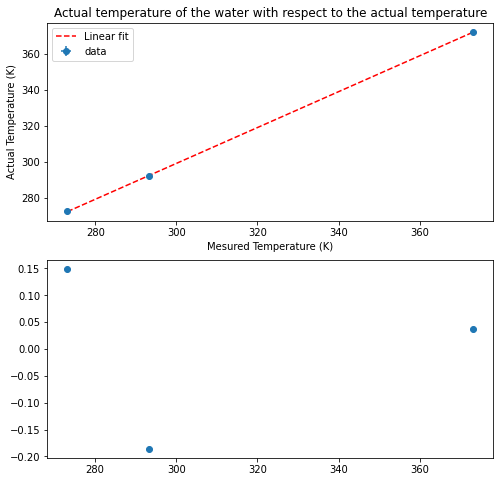

In [3]:
plt.figure(figsize=(8, 8))
plt.subplot(2,1,1)
y=calibration[0]
x=calibration[1]
plt.errorbar(unumpy.nominal_values(x),unumpy.nominal_values(y),xerr=unumpy.std_devs(x),yerr=unumpy.std_devs(y),fmt='o',label='data')
def f(x,a,b):
    return a*x + b
popt,pcov = optimize.curve_fit(f,xdata=unumpy.nominal_values(x), ydata=unumpy.nominal_values(y), sigma=(unumpy.std_devs(y)), p0=[-1,4])
print(popt)
t_popt = popt
perr = np.sqrt(np.diag(pcov))
print(perr)
t_perr = perr

def Temperature(T):
    return t_popt[0]*T + t_popt[1]

plt.plot(unumpy.nominal_values(x), f(unumpy.nominal_values(x),*popt), 'r--',label='Linear fit')

plt.title('Actual temperature of the water with respect to the actual temperature')
plt.legend()
plt.xlabel('Mesured Temperature (K)')
plt.ylabel('Actual Temperature (K)')

plt.subplot(2,1,2)
plt.plot(unumpy.nominal_values(x), unumpy.nominal_values(y)-(f(unumpy.nominal_values(x),*popt)), 'o')

print('-'*30)

f_degree = len(x)-1
print('Chi Square value:')
print(sum( ( (unumpy.nominal_values(y)-(f(unumpy.nominal_values(x),*popt))) / unumpy.std_devs(y))**2 ) )
print('Expected value')
print(f_degree)
print('Minimum Chi-Square for a good fit')
print(f_degree - 2* (2*f_degree)**0.5)
print('Maximum Chi-Square for a good fit')
print(f_degree + 2* (2*f_degree)**0.5)

print('Doubtful minimum Chi-Square for a good fit')
print(f_degree - 3* (2*f_degree)**0.5)
print('Doubtful maximum Chi-Square for a good fit')
print(f_degree + 3* (2*f_degree)**0.5)
print('-'*30)

plt.show
plt.savefig('Temperature')

[-4935.6936323     17.60687204]
[11.74968176  0.03231041]
------------------------------
Chi Square value:
45.87412484283824
Expected value
12
Minimum Chi-Square for a good fit
2.2020410288672885
Maximum Chi-Square for a good fit
21.79795897113271
Doubtful minimum Chi-Square for a good fit
-2.6969384566990673
Doubtful maximum Chi-Square for a good fit
26.696938456699066
------------------------------
L = (4.104+/-0.010)e+04
L (Interpolation) = 43276.77792748761


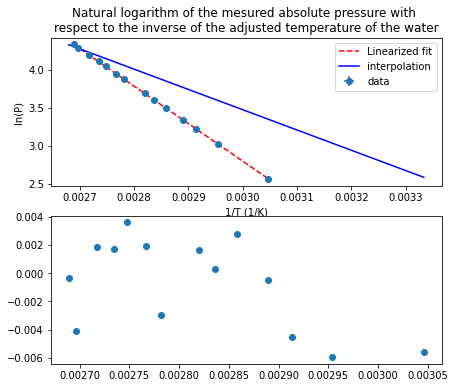

In [19]:
plt.figure(figsize=(7, 6))
plt.subplot(2,1,1)
y=unumpy.log(data[3][0] - (data[0]-data[1]))
x=1/Temperature(data[2])
plt.errorbar(unumpy.nominal_values(x),unumpy.nominal_values(y),xerr=unumpy.std_devs(x),yerr=unumpy.std_devs(y),fmt='o',label='data')
def f(x,a,b):
    return a*x + b
popt,pcov = optimize.curve_fit(f,xdata=unumpy.nominal_values(x), ydata=unumpy.nominal_values(y), sigma=(unumpy.std_devs(y)), p0=[-1,4])
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

plt.plot(unumpy.nominal_values(x), f(unumpy.nominal_values(x),*popt), 'r--',label='Linearized fit')

#plt.plot([1/373.15, unumpy.nominal_values(x[len(x)-1])],[np.log(76),np.log(-5205*(unumpy.nominal_values(x[len(x)-1])) + 18.3)], 'b-', label='interpolation')
plt.plot([1/373.15, 1/300],[np.log(76),np.e**(-5205*1/300 + 18.3)], 'b-', label='interpolation')

plt.title('''Natural logarithm of the mesured absolute pressure with 
respect to the inverse of the adjusted temperature of the water''')
plt.legend()
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(P)')

plt.subplot(2,1,2)
plt.plot(unumpy.nominal_values(x), unumpy.nominal_values(y)-(f(unumpy.nominal_values(x),*popt)), 'o')

print('-'*30)

f_degree = len(x)-2
print('Chi Square value:')
print(sum( ( (unumpy.nominal_values(y)-(f(unumpy.nominal_values(x),*popt))) / unumpy.std_devs(y))**2 ) )
print('Expected value')
print(f_degree)
print('Minimum Chi-Square for a good fit')
print(f_degree - 2* (2*f_degree)**0.5)
print('Maximum Chi-Square for a good fit')
print(f_degree + 2* (2*f_degree)**0.5)

print('Doubtful minimum Chi-Square for a good fit')
print(f_degree - 3* (2*f_degree)**0.5)
print('Doubtful maximum Chi-Square for a good fit')
print(f_degree + 3* (2*f_degree)**0.5)
print('-'*30)

plt.show

plt.savefig('ln(Pressure)')
print('L = ' + str(unc.ufloat(popt[0],perr[0]) * R * -1))

print('L (Interpolation) = ' + str(5205 * R))



C:\Users\cadot\AppData\Local\Temp/ipykernel_20400/2770188543.py:8: RuntimeWarning: overflow encountered in power
  return a* np.e ** (b/x)


[ 4.43207360e+07 -4.93573059e+03]
[1.43021471e+06 1.17348515e+01]
[328.30147143 338.54737143 343.22722857 346.10484286 349.85868572
 352.5969     354.66798572 359.53702858 361.3791     363.89825715
 365.66067143 367.99064286 370.84834286 371.88388572]
------------------------------
Chi Square value:
45.94325648777619
Expected value
12
Minimum Chi-Square for a good fit
2.2020410288672885
Maximum Chi-Square for a good fit
21.79795897113271
Doubtful minimum Chi-Square for a good fit
-2.6969384566990673
Doubtful maximum Chi-Square for a good fit
26.696938456699066
------------------------------
L = (4.104+/-0.010)e+04


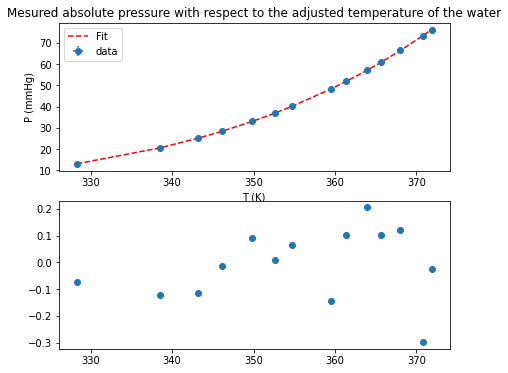

In [20]:
fig = plt.figure(figsize=(7, 6))

plt.subplot(2,1,1)
y=data[3][0] - (data[0]-data[1])
x=Temperature(data[2])
plt.errorbar(unumpy.nominal_values(x),unumpy.nominal_values(y),xerr=unumpy.std_devs(x),yerr=unumpy.std_devs(y),fmt='o',label='data')
def f(x,a,b):
    return a* np.e ** (b/x)  
popt,pcov = optimize.curve_fit(f,xdata=unumpy.nominal_values(x), ydata=unumpy.nominal_values(y), sigma=(unumpy.std_devs(y)), p0=[50,-4935])
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

plt.plot(unumpy.nominal_values(x), f(unumpy.nominal_values(x),*popt), 'r--',label='Fit')

plt.title('Mesured absolute pressure with respect to the adjusted temperature of the water')
plt.legend()
print(unumpy.nominal_values(x))
plt.ticklabel_format(style='plain')
plt.xlabel('T (K)')
plt.ylabel('P (mmHg)')

plt.subplot(2,1,2)
plt.plot(unumpy.nominal_values(x), unumpy.nominal_values(y)-(f(unumpy.nominal_values(x),*popt)), 'o')

print('-'*30)

f_degree = len(x)-2
print('Chi Square value:')
print(sum( ( (unumpy.nominal_values(y)-(f(unumpy.nominal_values(x),*popt))) / unumpy.std_devs(y))**2 ) )
print('Expected value')
print(f_degree)
print('Minimum Chi-Square for a good fit')
print(f_degree - 2* (2*f_degree)**0.5)
print('Maximum Chi-Square for a good fit')
print(f_degree + 2* (2*f_degree)**0.5)

print('Doubtful minimum Chi-Square for a good fit')
print(f_degree - 3* (2*f_degree)**0.5)
print('Doubtful maximum Chi-Square for a good fit')
print(f_degree + 3* (2*f_degree)**0.5)
print('-'*30)

plt.show

plt.savefig('Pressure')
print('L = ' + str(unc.ufloat(popt[1],perr[1]) * R * -1))